In [3]:
'''
__author__ = 'Alex Cheng'
Python集成方法工具包解决回归问题
ensemble.DecisionTreeRegressor

'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn import datasets,linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_curve,auc,roc_auc_score,mean_squared_error
from math import sqrt
import random

In [4]:
target_url = ("http://archive.ics.uci.edu/ml/machine-learning-databases/"
"wine-quality/winequality-red.csv")
df = pd.read_csv(target_url,header=0,sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


MSE:  0.31763931695127035


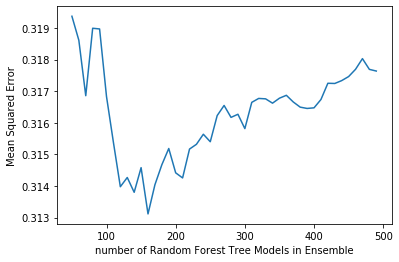

In [17]:
# 原始数组
xList  = np.array(df.iloc[:,:-1]) # 属性数组
labels = [i for i in df.iloc[:,-1]] # 最后一列就是label
names = df.columns

# RandomForest 要求数据为np.array格式
x = np.array(df.iloc[:,:-1])
y = np.array(labels)
wineNames = np.array(names)

# 正则化columns in x and labels
nrows = len(xList)
ncols = len(xList[0])

# model_selection
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size=0.30,random_state=828)

# 训练RF
mse = []
nTreeList = range(50,500,10)
for iTree in nTreeList:
    depth = None
    maxFeat = 4
    
    wineRF = ensemble.RandomForestRegressor(n_estimators=iTree,max_depth=depth,
            max_features=maxFeat,oob_score=False,random_state=828)
    wineRF.fit(xTrain,yTrain)
    
    pred = wineRF.predict(xTest)
    mse.append(mean_squared_error(yTest, pred))
print('MSE: ',mse[-1])

#
plt.plot(nTreeList,mse)
#plt.axis('tight')
plt.xlabel('number of Random Forest Tree Models in Ensemble')
plt.ylabel('Mean Squared Error')
#plt.ylim(0.0,max(mse))
plt.show() 



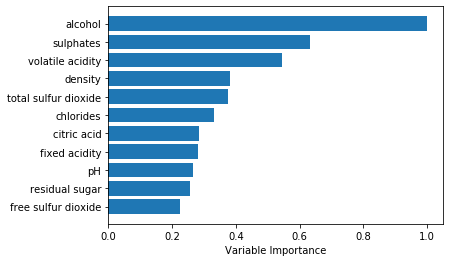

In [21]:
# 特征重要性
featImportance = wineRF.feature_importances_

# scale by max importance
featImportance = featImportance / featImportance.max()
sorted_idx = np.argsort(featImportance)
barPos = np.arange(sorted_idx.shape[0]) + 0.5 # 0.5放中间
plt.barh(barPos,featImportance[sorted_idx],align='center') # 特征重要性大小
plt.yticks(barPos,wineNames[sorted_idx]) # y坐标特征名
plt.xlabel('Variable Importance')
plt.show()
  